In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
from fastai.vision.all import *
path = Path('/content/gdrive/My Drive/sınıf/')

In [ ]:
train_fnames = get_image_files(path/"train")


In [ ]:
augs = [RandomResizedCropGPU(size=224 , min_scale=0.75 ), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=23),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls = dblock.dataloaders(train_fnames, batch_size=32)


In [ ]:
# print number of classes and length of train and valid datasets
dls.c, len(dls.train_ds), len(dls.valid_ds)

(2, 32, 7)

In [ ]:
dls.vocab

['calcification', 'normal']

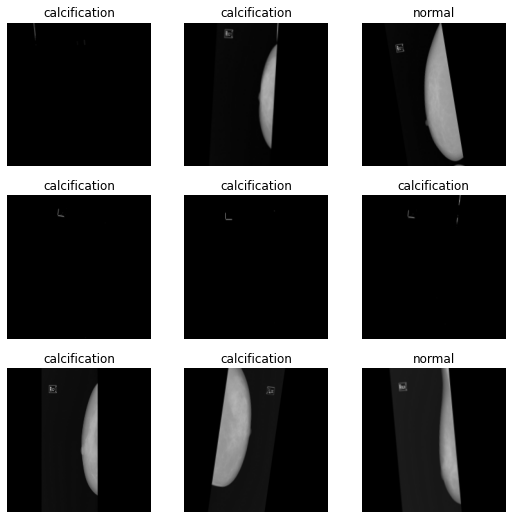

In [ ]:
dls.show_batch()

In [ ]:
model = nn.Sequential(create_body(xresnet50, pretrained=False),create_head(nf=2048, n_out=2))
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)



In [ ]:
learn.fit_one_cycle(40,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.811247,0.671000,0.714286,00:02
1,0.792200,0.686169,0.714286,00:02
2,0.837185,0.721734,0.285714,00:02
3,0.810301,0.779720,0.285714,00:02
4,0.826579,0.797998,0.285714,00:02
5,0.815656,0.832787,0.285714,00:02
6,0.774659,0.721683,0.285714,00:02
7,0.754946,0.753391,0.428571,00:02
8,0.745436,0.664055,0.714286,00:02
9,0.738176,0.834523,0.714286,00:02


In [ ]:
learn.save(path/'memeca')

Path('/content/gdrive/My Drive/sınıf/memeca.pth')

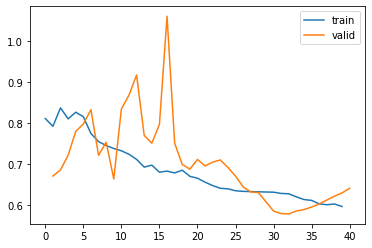

In [ ]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [ ]:
#test_items = get_image_files(path/"Test")
all_files= get_image_files(path)

# Evaluating model performance using the unseen test set

In [ ]:

augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=GrandparentSplitter(train_name='train', valid_name='test'),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls_test = dblock.dataloaders(all_files)



In [ ]:
print("Number of examples in testing:", len(dls_test.valid_ds))

Number of examples in testing: 12


In [ ]:
model = nn.Sequential(create_body(xresnet50, pretrained=False),create_head(nf=2048, n_out=2))

In [ ]:
learn1 = learn1 = Learner(dls_test, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy).load('/content/gdrive/My Drive/sınıf/memeca')

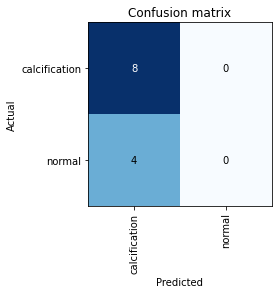

In [ ]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()


In [ ]:
interp.print_classification_report()

               precision    recall  f1-score   support

calcification       0.67      1.00      0.80         8
       normal       0.00      0.00      0.00         4

     accuracy                           0.67        12
    macro avg       0.33      0.50      0.40        12
 weighted avg       0.44      0.67      0.53        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
